<a href="https://colab.research.google.com/github/AnushkaT-2002/DAA-/blob/main/SentimentAnalysisUsingTwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Twitter Sentimeny Analysis Using Python

In [3]:
#import the libraries 
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Twitter API keys and Tokens
Access_token="1546858586437189634-2MmTjCZWYMVUDhRfTrEmYoHk0UUvKp"
Access_token_secret="glc9BrPiZXwrNyNA7CI4OZ4NfHIcegSQmwdgWnD39QPp3"
Consumer_key="KYYLiUqWCkCBGSnvF5RKR6XoH"
Consumer_secret="IrQEA0xApWF4NmPjCFDPmmrLLAG3pBKT1fy4jKH1r5Ne67xnNA"

In [5]:
#Creating OAuthHandler instance and make it equipped with access token
auth = tweepy.OAuthHandler(Consumer_key, Consumer_secret)
auth.set_access_token(Access_token, Access_token_secret)
api= tweepy.API(auth,wait_on_rate_limit=True)

In [6]:
#Verifying Our credentials using exception handling
try: 
  api.verify_credentials()
  print('Success')
except:
  print('failed')

Success


In [7]:
#Taking number of tweets we want to analyze as input
num= int(input("Enter the number of tweets you want to analyze:"))

Enter the number of tweets you want to analyze:50


In [8]:
#Taking hashtag or keyword as an input
searchTerm = input("Enter Keyword/Tag to search about: ")
search_query = searchTerm

Enter Keyword/Tag to search about: Bill Gates


In [17]:
# get tweets from the API
tweets = tweepy.Cursor(api.search,q=search_query,lang="en").items(num)
# store the API responses in a list
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Total Tweets fetched: 50


In [18]:
#Fetching the status of tweets using api.get_status() method of api class in tweepy module
text = api.get_status(id=tweet.id, tweet_mode='extended').full_text

In [20]:
tweets_df = pd.DataFrame()
# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name,'tweet': text,'hashtags': [hashtags if hashtags else None]}))
    tweets_df = tweets_df.reset_index(drop=True)
# show the dataframe
tweets_df


,user_name,tweet,hashtags
0,Elanor Gardner,"RT @CNBC: Bill Gates: ""Our grandchildren will ...",None
1,God bless Nigeria 🇳🇬,@TtifeB My guy u guys don't know that Bill Gat...,None
2,AMELIA BLAIR,RT @MattWallace888: Do you trust Elon Musk mor...,None
3,Annie B,RT @ichudov: Bill Gates (Bill and Melinda Gate...,None
4,Brian Jenkins,RT @Circuit_Crush: Success is a lousy teacher....,None
5,Barry,@eshaLegal That was an old clip when Americans...,None
6,pgtips,RT @MattWallace888: Do you trust Elon Musk mor...,None
7,I❤️Dems,RT @KariLake: 5. Two of the people trusted to ...,None
8,Eric Fraser,RT @Resist_05: If there’s one lesson we can ta...,None
9,cinciclone,@MattWallace888 I trust Bill Cosby to make me ...,None


In [22]:
#Method to remove hashtags, retweets, mentions and urls from the tweets
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '',text) #r tells that it is a raw string
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text)
    return text
tweets_df['tweet']= tweets_df['tweet'].apply(cleanText)
tweets_df

,user_name,tweet,hashtags
0,Elanor Gardner,": Bill Gates: ""Our grandchildren will grow up ...",None
1,God bless Nigeria 🇳🇬,"My guy u guys don't know that Bill Gates, Dan...",None
2,AMELIA BLAIR,: Do you trust Elon Musk more than Bill Gates?,None
3,Annie B,: Bill Gates (Bill and Melinda Gates Foundatio...,None
4,Brian Jenkins,_Crush: Success is a lousy teacher. It seduces...,None
5,Barry,That was an old clip when Americans were hogg...,None
6,pgtips,: Do you trust Elon Musk more than Bill Gates?,None
7,I❤️Dems,: 5. Two of the people trusted to run our elec...,None
8,Eric Fraser,_05: If there’s one lesson we can take out of ...,None
9,cinciclone,I trust Bill Cosby to make me a drink more th...,None


In [24]:
#Calculating subjectivity of tweets using TextBlob library 
def getSub(text):
  return TextBlob(text).sentiment.subjectivity

#Calculating polarity of tweets using TextBlob library 
def getPolarity(text):
   return TextBlob(text).sentiment.polarity

tweets_df['Subjectivity']=tweets_df['tweet'].apply(getSub)
tweets_df['Polarity']=tweets_df['tweet'].apply(getPolarity)
tweets_df

,user_name,tweet,hashtags,Subjectivity,Polarity
0,Elanor Gardner,": Bill Gates: ""Our grandchildren will grow up ...",None,0.600000,-0.400000
1,God bless Nigeria 🇳🇬,"My guy u guys don't know that Bill Gates, Dan...",None,0.000000,0.000000
2,AMELIA BLAIR,: Do you trust Elon Musk more than Bill Gates?,None,0.500000,0.500000
3,Annie B,: Bill Gates (Bill and Melinda Gates Foundatio...,None,0.333333,-0.083333
4,Brian Jenkins,_Crush: Success is a lousy teacher. It seduces...,None,0.380952,0.004762
5,Barry,That was an old clip when Americans were hogg...,None,0.350000,0.300000
6,pgtips,: Do you trust Elon Musk more than Bill Gates?,None,0.500000,0.500000
7,I❤️Dems,: 5. Two of the people trusted to run our elec...,None,0.666667,0.333333
8,Eric Fraser,_05: If there’s one lesson we can take out of ...,None,0.188889,-0.013889
9,cinciclone,I trust Bill Cosby to make me a drink more th...,None,0.500000,0.625000


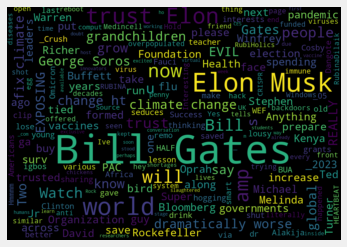

In [25]:
#representing the data in worldcloud form
allWords = ' '.join( [twts for twts in tweets_df['tweet']])
wordCloud = WordCloud(width=1000,height=700, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [26]:
#categorising as positive, negative and neutral
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

tweets_df['Analysis']=tweets_df['Polarity'].apply(getAnalysis)

tweets_df

,user_name,tweet,hashtags,Subjectivity,Polarity,Analysis
0,Elanor Gardner,": Bill Gates: ""Our grandchildren will grow up ...",None,0.600000,-0.400000,Negative
1,God bless Nigeria 🇳🇬,"My guy u guys don't know that Bill Gates, Dan...",None,0.000000,0.000000,Neutral
2,AMELIA BLAIR,: Do you trust Elon Musk more than Bill Gates?,None,0.500000,0.500000,Positive
3,Annie B,: Bill Gates (Bill and Melinda Gates Foundatio...,None,0.333333,-0.083333,Negative
4,Brian Jenkins,_Crush: Success is a lousy teacher. It seduces...,None,0.380952,0.004762,Positive
5,Barry,That was an old clip when Americans were hogg...,None,0.350000,0.300000,Positive
6,pgtips,: Do you trust Elon Musk more than Bill Gates?,None,0.500000,0.500000,Positive
7,I❤️Dems,: 5. Two of the people trusted to run our elec...,None,0.666667,0.333333,Positive
8,Eric Fraser,_05: If there’s one lesson we can take out of ...,None,0.188889,-0.013889,Negative
9,cinciclone,I trust Bill Cosby to make me a drink more th...,None,0.500000,0.625000,Positive


In [27]:
#positive tweets
j=1
sortedDF = tweets_df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if( sortedDF['Analysis'][i]=='Positive'):
     print(str(j) + ')' +sortedDF['tweet'][i])
     print()
     j=j+1

1): Do you trust Elon Musk more than Bill Gates?

2)_Crush: Success is a lousy teacher. It seduces smart people into thinking they can't lose. -Bill Gates 

3) That was an old clip when Americans were hogging the vaccines and were not sharing with the world 
The world and Africa is better off
Omicron saved the world from the World Health Organization dr. Fauci and Bill Gates

4): Do you trust Elon Musk more than Bill Gates?

5): 5. Two of the people trusted to run our election, Stephen Richer &amp; Bill Gates formed a Super PAC against me. They, along with…

6) I trust Bill Cosby to make me a drink more than I trust Bill(the world is overpopulated, so take this shot) Gates!

7): Do you trust Elon Musk more than Bill Gates?

8): Do you trust Elon Musk more than Bill Gates?

9)  Hmmmm. Medincell ….. funded by Bill &amp; Melinda Gates Foundation. Interesting.

10)_2023 so Bill Gates is literally trying to open backdoors in our immune system so viruses can hack .. but hey, there an anti vi

In [29]:
#Negative tweets
j=1
sortedDF = tweets_df.sort_values(by=['Polarity'], ascending='False')
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+')'+sortedDF['tweet'][i])
    print()
    j=j+1

1): Bill Gates: "Our grandchildren will grow up in a world that is dramatically worse off" than us if we don't fix climate change. ht…

2): Bill Gates (Bill and Melinda Gates Foundation) gave various "Clinton" interests $655,347,255 via 167 grants.

Over HALF A BILL…

3)_05: If there’s one lesson we can take out of the last two years… it’s the WEF should be shut down, all young global leaders remo…

4): Elon Musk EXPOSING JUST HOW EVIL Bill Gates REALLY IS ⚠️ Watch Now: 

5): Elon Musk EXPOSING JUST HOW EVIL Bill Gates REALLY IS ⚠️ Watch Now: 

6): Elon Musk EXPOSING JUST HOW EVIL Bill Gates REALLY IS ⚠️ Watch Now: 

7): Bill Gates: "Our grandchildren will grow up in a world that is dramatically worse off" than us if we don't fix climate change. ht…

8) Arrest Bill Gates now

9): Bill Gates: "Our grandchildren will grow up in a world that is dramatically worse off" than us if we don't fix climate change. ht…

10) Bill Gates is a terrible person

11) BILL GATES HAS NEW CONSPIRACY THEORY

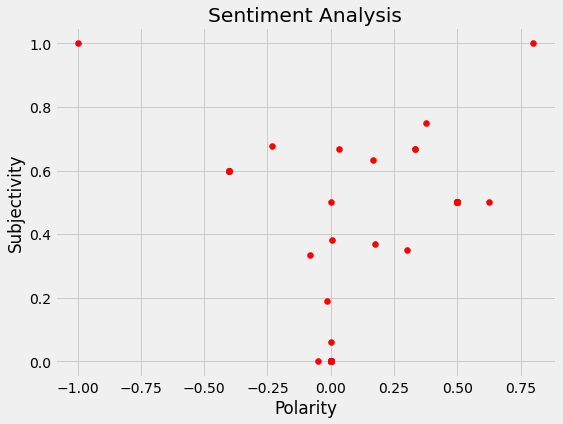

In [30]:
#Scatter plot represenation of data
plt.figure(figsize=(8,6))
for i in range(0,tweets_df.shape[0]):
  plt.scatter(tweets_df['Polarity'][i],tweets_df['Subjectivity'][i], color='Red')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [32]:
#percentage of positive tweets
ptweets = tweets_df[tweets_df.Analysis=='Positive']
ptweets = ptweets['tweet']

round((ptweets.shape[0]/tweets_df.shape[0])*100, 1)

46.0

In [34]:
#percentage of negative
ntweets = tweets_df[tweets_df.Analysis=='Negative']
ntweets = ntweets['tweet']

round((ntweets.shape[0]/tweets_df.shape[0])*100,1)

22.0

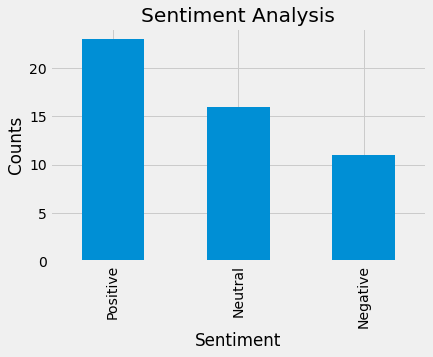

In [35]:
#Bar graph representation of data
tweets_df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets_df['Analysis'].value_counts().plot(kind='bar')
plt.show()